# Lending Club loan data

## import library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [156]:
df_origin = pd.read_csv('data/LendingClub_loandata/2015.csv',
                        low_memory=False
                        )

df_origin.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Data columns (total 153 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    Unnamed: 0                                  421095 non-null  int64  
 1    id                                          421095 non-null  int64  
 2    member_id                                   0 non-null       float64
 3    loan_amnt                                   421095 non-null  float64
 4    funded_amnt                                 421095 non-null  float64
 5    funded_amnt_inv                             421095 non-null  float64
 6    term                                        421095 non-null  object 
 7    int_rate                                    421095 non-null  float64
 8    installment                                 421095 non-null  float64
 9    grade                                       421095 non-nu

## feature selecting: minimum

In [157]:
select_cols = ['loan_status', ## 타겟 변수: 대출 상태
               'annual_inc', ## 수치형 변수: 연수입
               'dti', ## 수치형 변수: 총부채 상환비율
               'loan_amnt', ## 수치형 변수: 신청 대출 금액
               'revol_bal', 'revol_util', ## 수치형 변수: 리볼빙 관련
               'fico_range_low', 'fico_range_high', ## 수치형 변수: 신용 점수
               'pub_rec', ## 수치형 변수: 공공 파산/압류 기록
               'delinq_2yrs', ## 수치형 변수: 지난 2년간 30일 이상 연체한 횟수
               
               'term', ## 범주형 변수: 상환 기간 (원핫 대상)
               'home_ownership', ## 범주형 변수: 거주 형태 (원핫 대상)
               'purpose', ## 범주형 변수: 대출 목적 (원핫 대상)
               
               'emp_length', ## 범주형 변수: 근속연수 (전처리 및 수치형 변수 변환)

            #    'grade', 'sub_grade', ## 범주형 변수: 원핫 인코딩 대상 ## 얘네는 심사 후에 결정되는 것...
               ]

In [158]:
df = df_origin[ select_cols ]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_status      421095 non-null  object 
 1   annual_inc       421095 non-null  float64
 2   dti              421093 non-null  float64
 3   loan_amnt        421095 non-null  float64
 4   revol_bal        421095 non-null  float64
 5   revol_util       420933 non-null  float64
 6   fico_range_low   421095 non-null  float64
 7   fico_range_high  421095 non-null  float64
 8   pub_rec          421095 non-null  float64
 9   delinq_2yrs      421095 non-null  float64
 10  term             421095 non-null  object 
 11  home_ownership   421095 non-null  object 
 12  purpose          421095 non-null  object 
 13  emp_length       397278 non-null  object 
dtypes: float64(9), object(5)
memory usage: 45.0+ MB


## drop NaN

In [159]:
df = df.dropna()
df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397119 entries, 0 to 397118
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loan_status      397119 non-null  object 
 1   annual_inc       397119 non-null  float64
 2   dti              397119 non-null  float64
 3   loan_amnt        397119 non-null  float64
 4   revol_bal        397119 non-null  float64
 5   revol_util       397119 non-null  float64
 6   fico_range_low   397119 non-null  float64
 7   fico_range_high  397119 non-null  float64
 8   pub_rec          397119 non-null  float64
 9   delinq_2yrs      397119 non-null  float64
 10  term             397119 non-null  object 
 11  home_ownership   397119 non-null  object 
 12  purpose          397119 non-null  object 
 13  emp_length       397119 non-null  object 
dtypes: float64(9), object(5)
memory usage: 42.4+ MB


## one-hot encoding

In [160]:
df = pd.get_dummies(df, columns=['term', 'home_ownership', 'purpose'],
                    drop_first=True, dtype=int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397119 entries, 0 to 397118
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_status                 397119 non-null  object 
 1   annual_inc                  397119 non-null  float64
 2   dti                         397119 non-null  float64
 3   loan_amnt                   397119 non-null  float64
 4   revol_bal                   397119 non-null  float64
 5   revol_util                  397119 non-null  float64
 6   fico_range_low              397119 non-null  float64
 7   fico_range_high             397119 non-null  float64
 8   pub_rec                     397119 non-null  float64
 9   delinq_2yrs                 397119 non-null  float64
 10  emp_length                  397119 non-null  object 
 11  term_ 60 months             397119 non-null  int64  
 12  home_ownership_MORTGAGE     397119 non-null  int64  
 13  home_ownership

## to numeric

In [ ]:
# grade_list = sorted(df['sub_grade'].unique().tolist())
# score_list = [x for x in range(len(grade_list), 0, -1)]

# grade_map = dict(zip(grade_list, score_list))
# df['sub_grade_score'] = df['sub_grade'].map(grade_map)

# df = df.drop('sub_grade', axis=1)
# df = df.reset_index(drop=True)

In [161]:
emp_length_map = {'< 1 year': 0,
                  '1 year': 1,
                  '2 years': 2,
                  '3 years': 3,
                  '4 years': 4,
                  '5 years': 5,
                  '6 years': 6,
                  '7 years': 7,
                  '8 years': 8,
                  '9 years': 9,
                  '10+ years': 10
                  }

df['emp_length_score'] = df['emp_length'].map(emp_length_map)

df = df.drop('emp_length', axis=1)
df = df.reset_index(drop=True)

## target setting

In [162]:
df = df.loc[ df['loan_status']!='In Grace Period' , ]

status_map = {'Fully Paid': 0,
              'Current': 0,
              'Charged Off': 1,
            #   'In Grace Period': 1,
              'Late (31-120 days)': 1,
              'Late (16-30 days)': 1,
              'Default': 1,
              }

df['loan_status'] = df['loan_status'].map(status_map)

df = df.reset_index(drop=True)

## dataset split

In [163]:
y = df['loan_status']
x = df.drop('loan_status', axis=1)

In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## data scaling

In [165]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

x_train_mm = mm_scaler.fit_transform(x_train)
x_test_mm = mm_scaler.transform(x_test)

## modeling

In [ ]:
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
ratio

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression(class_weight='balanced')
model_rfc = RandomForestClassifier(class_weight='balanced')
model_xgbc = XGBClassifier(scale_pos_weight=ratio)

model_lr.fit(x_train, y_train)
model_rfc.fit(x_train, y_train)
model_xgbc.fit(x_train, y_train)

y_pred_lr = model_lr.predict(x_test)
y_pred_rfc = model_rfc.predict(x_test)
y_pred_xgbc = model_xgbc.predict(x_test)



model_lr.fit(x_train_mm, y_train)
model_rfc.fit(x_train_mm, y_train)
model_xgbc.fit(x_train_mm, y_train)

y_pred_lr_mm = model_lr.predict(x_test_mm)
y_pred_rfc_mm = model_rfc.predict(x_test_mm)
y_pred_xgbc_mm = model_xgbc.predict(x_test_mm)

/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

## metrics

In [15]:
from sklearn.metrics import classification_report

In [16]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68609
           1       0.00      0.00      0.00     15488

    accuracy                           0.82     84097
   macro avg       0.41      0.50      0.45     84097
weighted avg       0.67      0.82      0.73     84097



/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [18]:
print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: min-max
Using cols: ['annual_inc']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68609
           1       0.00      0.00      0.00     15488

    accuracy                           0.82     84097
   macro avg       0.41      0.50      0.45     84097
weighted avg       0.67      0.82      0.73     84097



/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [41]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68609
           1       0.00      0.00      0.00     15488

    accuracy                           0.82     84097
   macro avg       0.41      0.50      0.45     84097
weighted avg       0.67      0.82      0.73     84097



In [43]:
print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: min-max
Using cols: ['annual_inc', 'dti']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68609
           1       0.00      0.00      0.00     15488

    accuracy                           0.82     84097
   macro avg       0.41      0.50      0.45     84097
weighted avg       0.67      0.82      0.73     84097



In [54]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68609
           1       0.00      0.00      0.00     15488

    accuracy                           0.82     84097
   macro avg       0.41      0.50      0.45     84097
weighted avg       0.67      0.82      0.73     84097



In [56]:
print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: min-max
Using cols: ['annual_inc', 'dti', 'loan_amnt']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68609
           1       0.00      0.00      0.00     15488

    accuracy                           0.82     84097
   macro avg       0.41      0.50      0.45     84097
weighted avg       0.67      0.82      0.73     84097



In [68]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68583
           1       0.00      0.00      0.00     15481

    accuracy                           0.82     84064
   macro avg       0.41      0.50      0.45     84064
weighted avg       0.67      0.82      0.73     84064



In [70]:
print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: min-max
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68583
           1       0.00      0.00      0.00     15481

    accuracy                           0.82     84064
   macro avg       0.41      0.50      0.45     84064
weighted avg       0.67      0.82      0.73     84064



In [82]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'term', 'grade']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68583
           1       1.00      0.00      0.00     15481

    accuracy                           0.82     84064
   macro avg       0.91      0.50      0.45     84064
weighted avg       0.85      0.82      0.73     84064



In [84]:
print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: min-max
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'term', 'grade']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     68583
           1       0.53      0.01      0.01     15481

    accuracy                           0.82     84064
   macro avg       0.68      0.50      0.46     84064
weighted avg       0.76      0.82      0.74     84064



In [96]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'term', 'grade', 'emp_length', 'sub_grade']
---------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     64944
           1       0.50      0.03      0.06     14361

    accuracy                           0.82     79305
   macro avg       0.66      0.51      0.48     79305
weighted avg       0.76      0.82      0.75     79305



In [98]:
print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: min-max
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'term', 'grade', 'emp_length', 'sub_grade']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     64944
           1       0.50      0.01      0.02     14361

    accuracy                           0.82     79305
   macro avg       0.66      0.50      0.46     79305
weighted avg       0.76      0.82      0.74     79305



In [113]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'term', 'grade', 'home_ownership', 'emp_length', 'sub_grade']
---------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     64944
           1       0.51      0.03      0.06     14361

    accuracy                           0.82     79305
   macro avg       0.66      0.51      0.48     79305
weighted avg       0.77      0.82      0.75     79305



In [119]:
print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

print('======================================')

print('Results: Random Forest Classifier')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc))

print('======================================')

print('Results: XGBoost Classifier')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_xgbc))

Results: Logistic Regression
Scaling: min-max
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'term', 'grade', 'home_ownership', 'emp_length', 'sub_grade']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     64944
           1       0.53      0.02      0.03     14361

    accuracy                           0.82     79305
   macro avg       0.68      0.51      0.47     79305
weighted avg       0.77      0.82      0.74     79305

Results: Random Forest Classifier
Scaling: min-max
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'term', 'grade', 'home_ownership', 'emp_length', 'sub_grade']
---------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     64944
           1       0.46      0.05      0.09     14361

    accuracy                           0.82     79305
   macro avg       0.64      0

In [ ]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

print('======================================')

print('Results: Random Forest Classifier')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc))

print('======================================')

print('Results: XGBoost Classifier')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_xgbc))

print('======================================')
print('======================================')

print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr_mm))

print('======================================')

print('Results: Random Forest Classifier')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc_mm))

print('======================================')

print('Results: XGBoost Classifier')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_xgbc_mm))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high', 'pub_rec', 'delinq_2yrs', 'term', 'home_ownership', 'emp_length']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     64944
           1       0.40      0.00      0.00     14361

    accuracy                           0.82     79305
   macro avg       0.61      0.50      0.45     79305
weighted avg       0.74      0.82      0.74     79305

Results: Random Forest Classifier
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high', 'pub_rec', 'delinq_2yrs', 'term', 'home_ownership', 'emp_length']
---------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     64944
           1       0.41      0.02      0.04     14361

    accuracy  

In [168]:
print('Results: Logistic Regression')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

print('======================================')

print('Results: Random Forest Classifier')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc))

print('======================================')

print('Results: XGBoost Classifier')
print('Scaling: X')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_xgbc))

print('======================================')
print('======================================')

print('Results: Logistic Regression')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr_mm))

print('======================================')

print('Results: Random Forest Classifier')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc_mm))

print('======================================')

print('Results: XGBoost Classifier')
print('Scaling: min-max')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_xgbc_mm))

Results: Logistic Regression
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high', 'pub_rec', 'delinq_2yrs', 'term', 'home_ownership', 'purpose', 'emp_length']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     64944
           1       0.33      0.00      0.00     14361

    accuracy                           0.82     79305
   macro avg       0.58      0.50      0.45     79305
weighted avg       0.73      0.82      0.74     79305

Results: Random Forest Classifier
Scaling: X
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high', 'pub_rec', 'delinq_2yrs', 'term', 'home_ownership', 'purpose', 'emp_length']
---------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     64944
           1       0.40      0.02      0.04    

In [174]:
print('Results: Logistic Regression')
print('Scaling: X')
print('Class Weight: balanced')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr))

print('======================================')

print('Results: Random Forest Classifier')
print('Scaling: X')
print('Class Weight: balanced')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc))

print('======================================')

print('Results: XGBoost Classifier')
print('Scaling: X')
print('Class Weight: balanced')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_xgbc))

print('======================================')
print('======================================')

print('Results: Logistic Regression')
print('Scaling: min-max')
print('Class Weight: balanced')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_lr_mm))

print('======================================')

print('Results: Random Forest Classifier')
print('Scaling: min-max')
print('Class Weight: balanced')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_rfc_mm))

print('======================================')

print('Results: XGBoost Classifier')
print('Scaling: min-max')
print('Class Weight: balanced')
print(f'Using cols: {select_cols[1:]}')
print('---------------------------')

print(classification_report(y_test, y_pred_xgbc_mm))

Results: Logistic Regression
Scaling: X
Class Weight: balanced
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high', 'pub_rec', 'delinq_2yrs', 'term', 'home_ownership', 'purpose', 'emp_length']
---------------------------
              precision    recall  f1-score   support

           0       0.86      0.58      0.69     64944
           1       0.23      0.57      0.33     14361

    accuracy                           0.58     79305
   macro avg       0.55      0.58      0.51     79305
weighted avg       0.75      0.58      0.63     79305

Results: Random Forest Classifier
Scaling: X
Class Weight: balanced
Using cols: ['annual_inc', 'dti', 'loan_amnt', 'revol_bal', 'revol_util', 'fico_range_low', 'fico_range_high', 'pub_rec', 'delinq_2yrs', 'term', 'home_ownership', 'purpose', 'emp_length']
---------------------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     64944
 

## feature importance

In [178]:
importances = model_rfc.feature_importances_
feature_names = x_train.columns

fi_df = pd.DataFrame({'feature': feature_names,
                     'importance': importances
                     })

fi_df = fi_df.sort_values(by='importance', ascending=False)

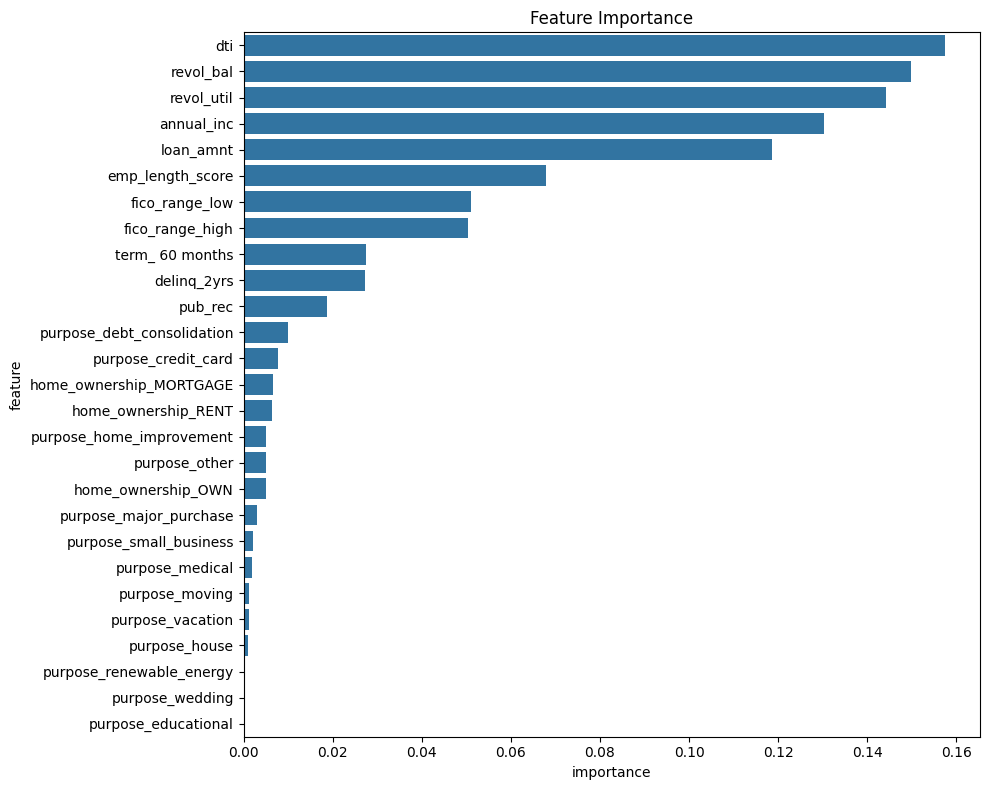

In [179]:
plt.figure(figsize=(10, 8))

sns.barplot(x='importance', y='feature', data=fi_df)

plt.title('Feature Importance')

plt.tight_layout()
plt.show()

In [190]:
len(np.round(model_lr.coef_, 2)[0])

27

In [188]:
len(feature_names)

27

In [198]:
fi_df2 = pd.DataFrame({'feature': feature_names,
                       'importance': np.round(model_lr.coef_, 2)[0],
                       })

fi_df2

,feature,importance
0,annual_inc,-5.32
1,dti,10.40
2,loan_amnt,0.44
3,revol_bal,-11.16
4,revol_util,-0.62
5,fico_range_low,-1.32
6,fico_range_high,-1.31
7,pub_rec,2.09
8,delinq_2yrs,-0.10
9,term_ 60 months,0.68
